# Mask R-CNN - Inspect Datasets

Inspect and visualize data loading and pre-processing code.

In [3]:
import os
import sys
#import itertools
#import math
#import logging
#import json
#import re
import random
#from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.tabletop import tabletop
from samples.tabletop import datasets
from samples.tabletop import configurations

%matplotlib inline 

## Configuration

In [6]:
config = configurations.TabletopConfigTraining()
DATASET_ROOT_DIR = os.path.join(ROOT_DIR, "datasets/RAL_experiments")

## Dataset

In [8]:
# Load dataset
# Get the dataset from the releases page
dataset = datasets.TabletopDataset()
dataset.load_dataset(DATASET_ROOT_DIR, "val")

# Actually load image paths
dataset.prepare()

#print("Image Count: {}".format(len(dataset.image_ids)))
#print("Class Count: {}".format(dataset.num_classes))
#for i, info in enumerate(dataset.class_info):
#    print("{:3}. {:50}".format(i, info['name']))

Classes loaded:  17
	ID 0:	BG
	ID 1:	001_chips_can
	ID 2:	002_master_chef_can
	ID 3:	003_cracker_box
	ID 4:	005_tomato_soup_can
	ID 5:	006_mustard_bottle
	ID 6:	009_gelatin_box
	ID 7:	010_potted_meat_can
	ID 8:	011_banana
	ID 9:	012_strawberry
	ID 10:	016_pear
	ID 11:	035_power_drill
	ID 12:	037_scissors
	ID 13:	048_hammer
	ID 14:	050_medium_clamp
	ID 15:	056_tennis_ball
	ID 16:	061_foam_brick
Loading  val dataset...
1380/1380 [==============================] - 28s 20ms/step


## Display Samples

Load and display images and masks.

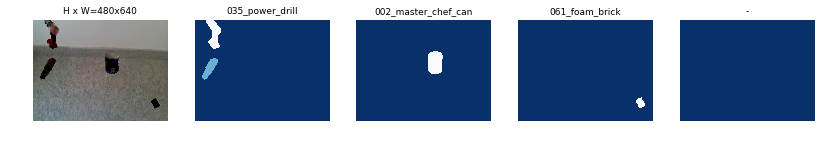

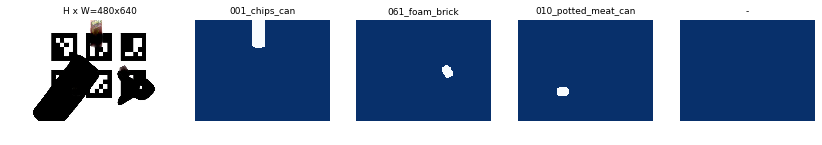

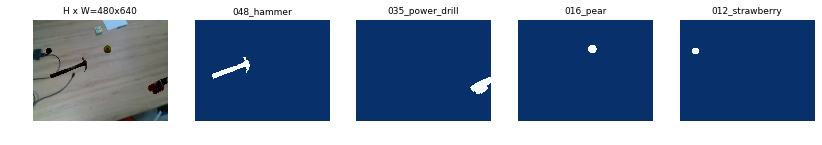

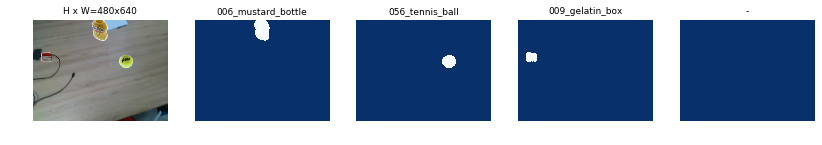

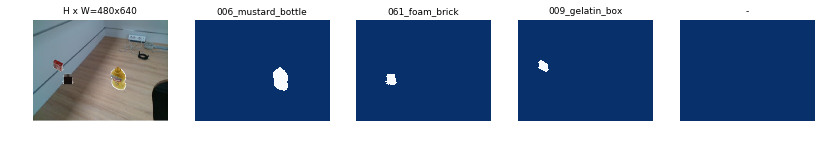

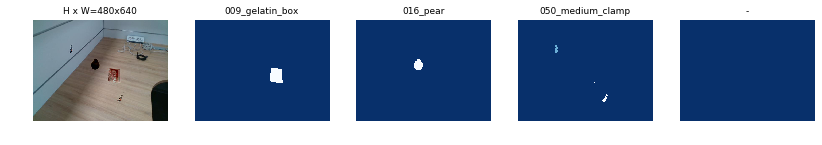

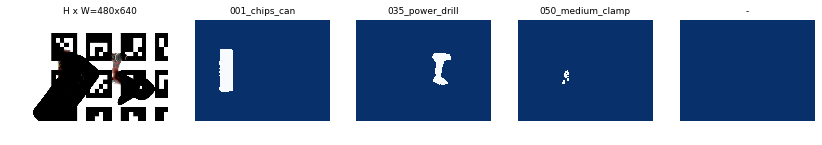

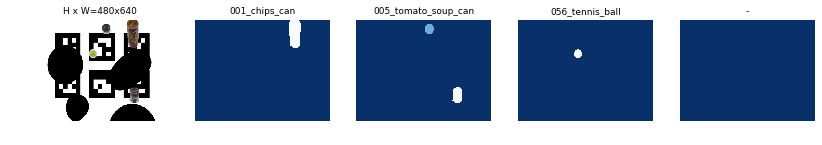

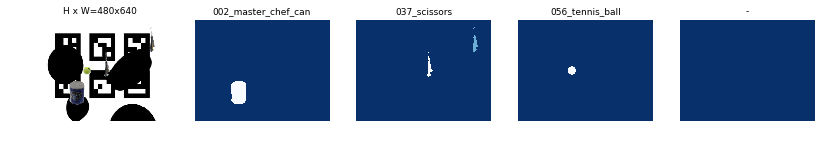

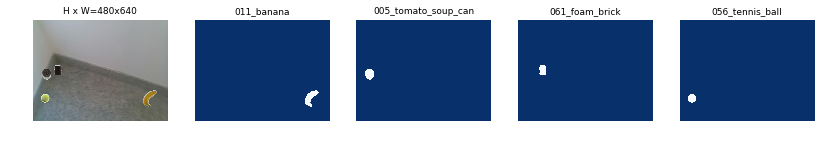

In [9]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 10)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    try:
        mask, class_ids = dataset.load_mask(image_id)
    except AssertionError:
        print("No mask available for image {}".format(dataset.image_info[image_id]))
        continue
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding Boxes

Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

image_id  1026 /home/IIT.LOCAL/fbottarel/Mask_RCNN/datasets/RAL_experiments/val/images/883_image_poisson.jpg
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (480, 640, 3)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (3,)                  min:    8.00000  max:   13.00000  int32
bbox                     shape: (3, 4)                min:   44.00000  max:  492.00000  int32


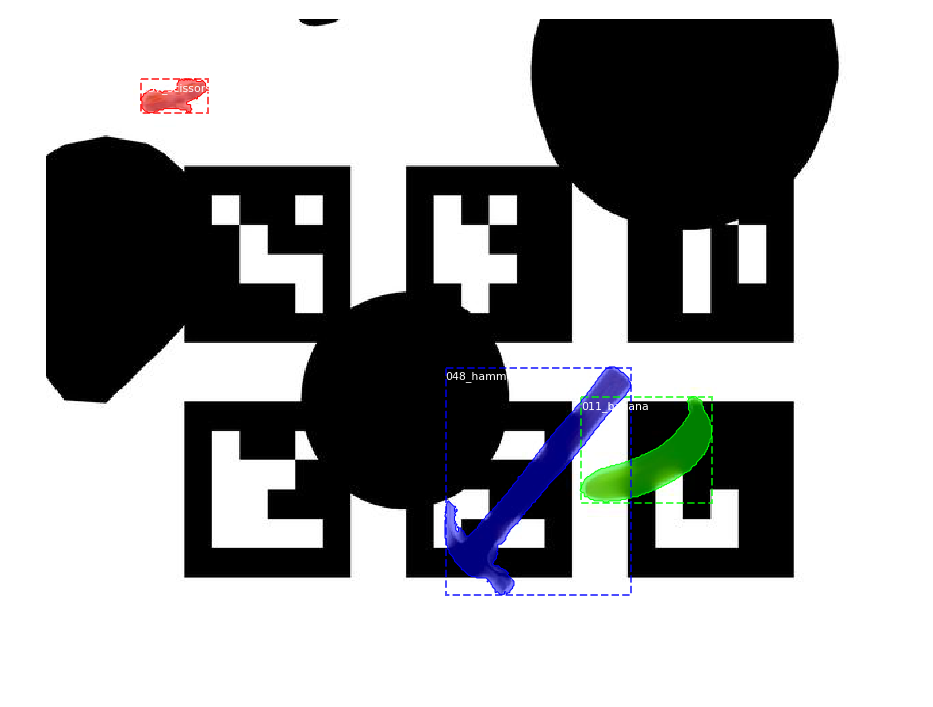

In [14]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)